In [53]:
# Pierre's PhD, June 2019
# Visualize MaxPooling & AvgPooling on imgA.png

import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import torch
import torch.nn as nn
import torch.nn.functional as F

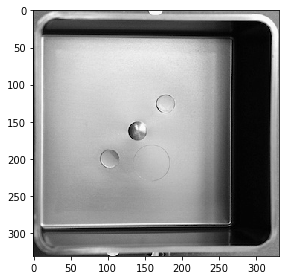

In [303]:
bgr_img = cv2.imread('imgA.jpg')
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img.astype("float32")/255
plt.imshow(gray_img, cmap='gray')
plt.tight_layout()
# plt.show()
plt.savefig('imgA_gray.pdf', bbox_inches='tight')
plt.close(fig)

In [175]:
filter_vals = np.array([[-1, 1, 0],
                           [0, 2, 1],
                           [-1, 0, 0]])
print('Filter shape: ', filter_vals.shape)

filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
print('Filter 1: \n', filter_4)

Filter shape:  (3, 3)
Filter 1: 
 [[ 1  0  1]
 [-1 -2  0]
 [ 0 -1  0]]


In [273]:
class Net(nn.Module):
    """A convolutional neural network to process 4 filters

    Args:
     weight: matrix of filters
    """
    def __init__(self, weight: numpy.ndarray, pooling: str) -> None:
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        # define a pooling layer
        if pooling is 'max':
            self.pool = nn.MaxPool2d(2, 2)
        elif pooling is 'avg':
            self.pool = nn.AvgPool2d(2, 2)
        else:
            raise ValueError('"%s" pooling parameters is not defined. Must be "max" or "avg".' % pooling)

    def forward(self, x: torch.Tensor):
        """calculates the output of a convolutional layer

        Args:
         x: image to process

        Returns:
         layers: convolutional, activated, and pooled layers
        """
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)

        # applies pooling layer
        pooled_x = self.pool(activated_x)

        # returns all layers
        return conv_x, activated_x, pooled_x

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model_max = Net(weight, pooling='max')
print(model_max)

gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
conv_layer, activated_layer, pooled_layer = model_max(gray_img_tensor)

Net(
  (conv): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [304]:
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(left=0, right=2, bottom=0.1, top=1, hspace=0.05, wspace=0.1)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filtre de convolution %s' % str(i+1))
# plt.tight_layout()
# plt.show()
fig.savefig('imgA_filters.pdf', bbox_inches='tight')
plt.close(fig)

In [294]:
def viz_layer(layer, n_filters = 4):
    fig = plt.figure(figsize=(20, 10))
    for i in range(n_filters):
        ax = fig.add_subplot(2, n_filters, i+1)
        # grab layer outputs
        img = np.squeeze(layer[0, i].data.numpy())
        ax.imshow(img, cmap='gray')
        ax.set_title('Filtre %s' % str(i+1))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax = fig.add_subplot(2, n_filters, (i+1)+4)
        # grab layer outputs
        # img = np.squeeze(layer[0, i].data.numpy())
        ax.hist(img.ravel(), bins=100, density=True, range=(0, 2.5), facecolor='g')  # fc='k', ec='k',  
        # print(img.min(), img.mean(), img.max())
    plt.tight_layout()
    # plt.show()
    fig.savefig('imgA_pool.pdf', bbox_inches='tight')
    plt.close(fig)

In [295]:
viz_layer(activated_layer)

In [296]:
viz_layer(pooled_layer)

In [297]:
model_avg = Net(weight, pooling='avg')
conv_layer, activated_layer, pooled_layer = model_avg(gray_img_tensor)

In [300]:
viz_layer(activated_layer)

In [299]:
viz_layer(pooled_layer)